In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#Species are to be classified. It's a classification problem

In [5]:
#Assigning labels to the species

In [4]:
df['species'] = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

In [5]:
df['species'].unique()

array([0, 1, 2], dtype=int64)

In [6]:
df = df[df['species'] != 2] # Making the problem binary, which includes only 0 & 1 classes

In [9]:
# Independent and Dependent Features

In [7]:
X = df.iloc[:, :-1] # Every column except for the last column
y = df.iloc[:, -1]  # last column

In [10]:
y   

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: species, Length: 100, dtype: int64

In [11]:
y.unique()

array([0, 1], dtype=int64)

In [27]:
# df = df[df['species'] != 2] # Making the problem binary

In [28]:
# df['species'].unique()

array([0, 1], dtype=int64)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [8]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()

In [12]:
from sklearn.model_selection import GridSearchCV
parameter = {'C':[0.5, 1, 2, 3, 5, 6, 7, 9, 10, 30, 45], 'penalty':['l2', 'elasticnet']}
log_regressor = GridSearchCV(regression, parameter, scoring = 'accuracy', cv = 5)

log_regressor.fit(X, y)

c:\Users\ksk76\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
55 fits failed out of a total of 110.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ksk76\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ksk76\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\ksk76\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Valu

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 5, 6, 7, 9, 10, 30, 45],
                         'penalty': ['l2', 'elasticnet']},
             scoring='accuracy')

In [13]:
print(log_regressor.best_params_)

{'C': 0.5, 'penalty': 'l2'}


In [38]:
print(log_regressor.best_score_) #over-fitting

1.0


In [39]:
prediction_log = log_regressor.predict(X_test)

In [16]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.205926,0.812458,0.789608,0.728290
sepal_width,-0.205926,1.000000,-0.602663,-0.570883,-0.690684
petal_length,0.812458,-0.602663,1.000000,0.979322,0.969990
petal_width,0.789608,-0.570883,0.979322,1.000000,0.960307
species,0.728290,-0.690684,0.969990,0.960307,1.000000


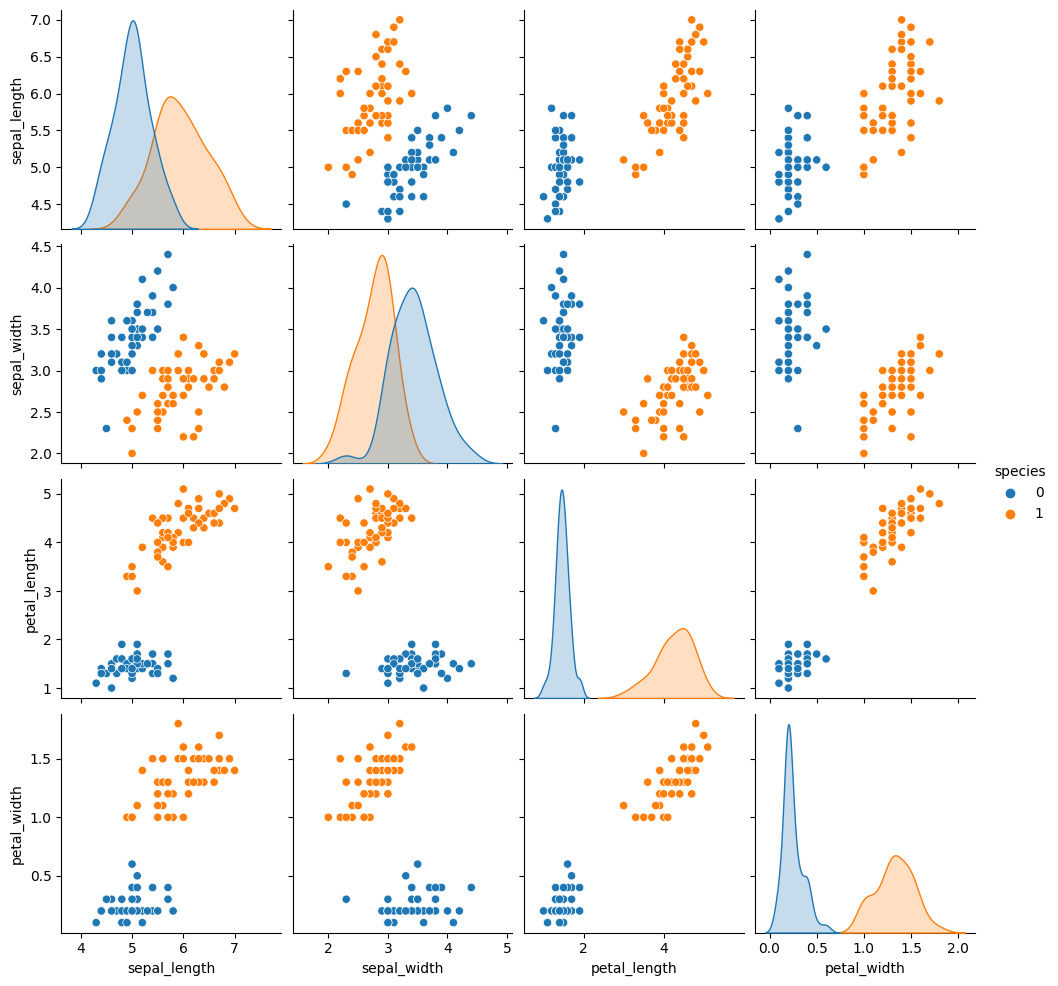

In [19]:
sns.pairplot(df, hue='species')

## They are clearly seperable, that's why we are getting high score of accuracy

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_auc_score, f1_score
confusion_matrix(y_test, prediction_log)

array([[12,  0],
       [ 0,  8]], dtype=int64)

In [41]:
f1_score(y_test, prediction_log)

1.0

In [20]:
#After even testing, the classification if well done. So it's not overfitting. It's performing